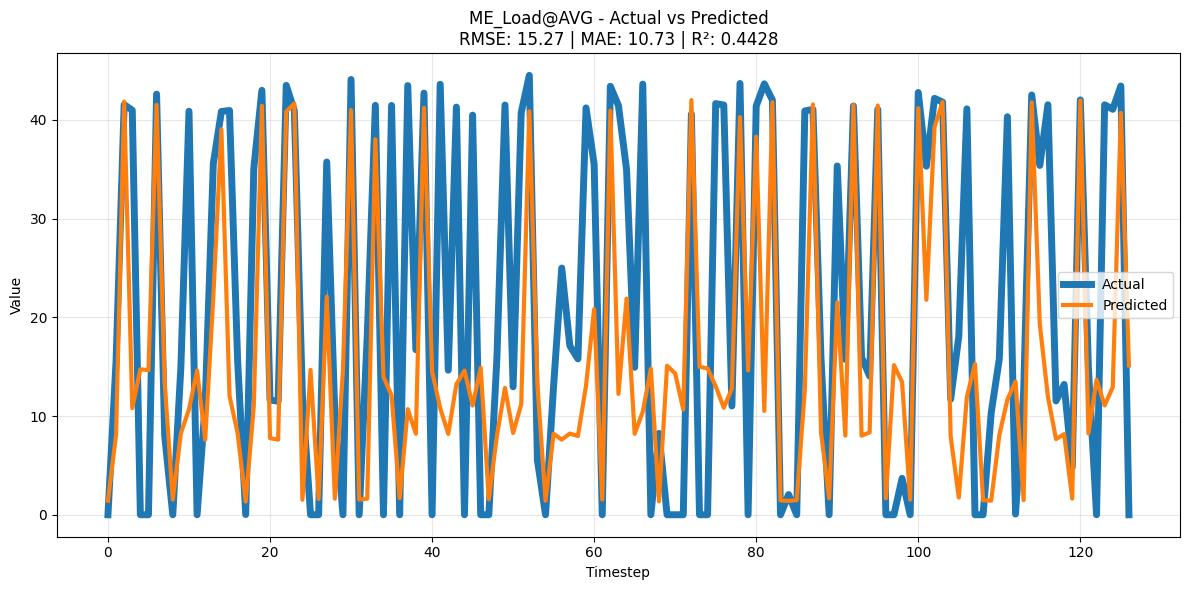

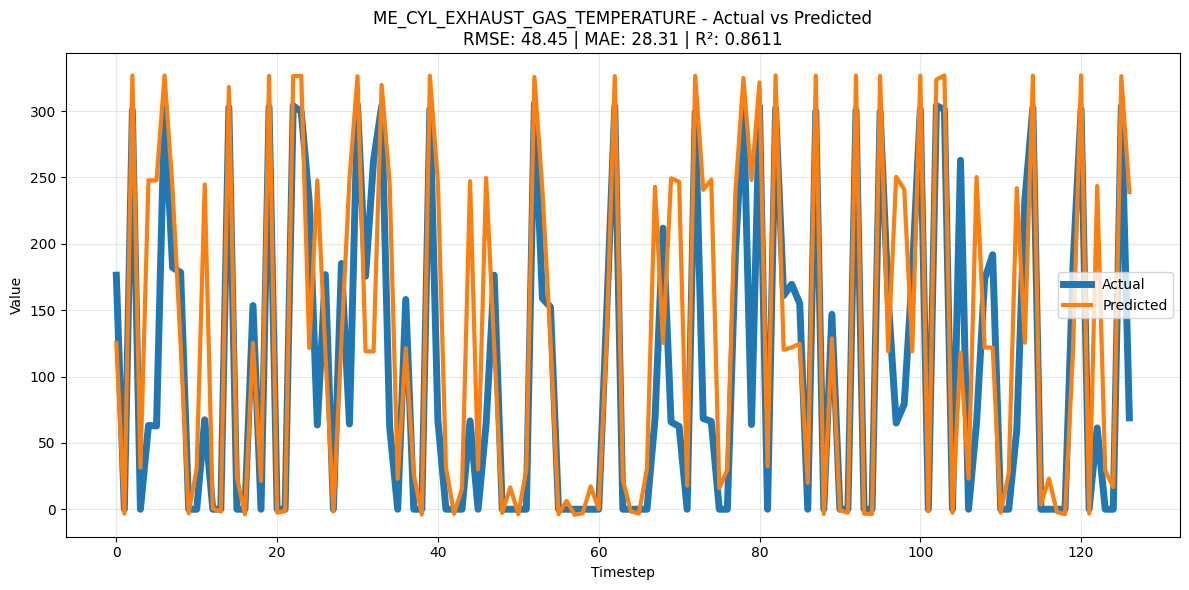

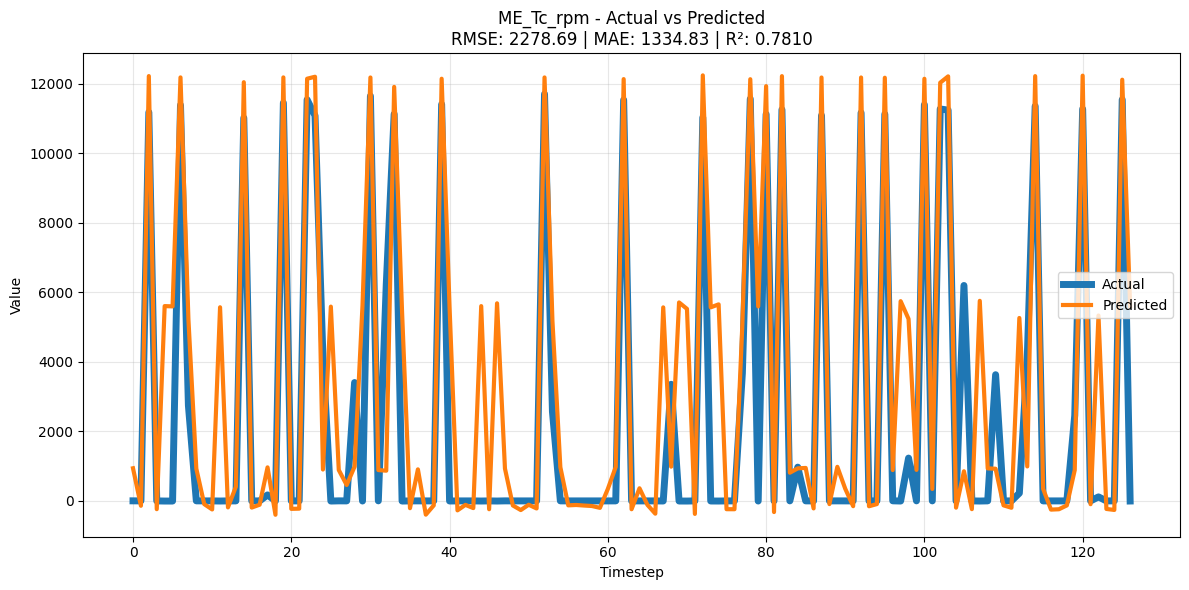

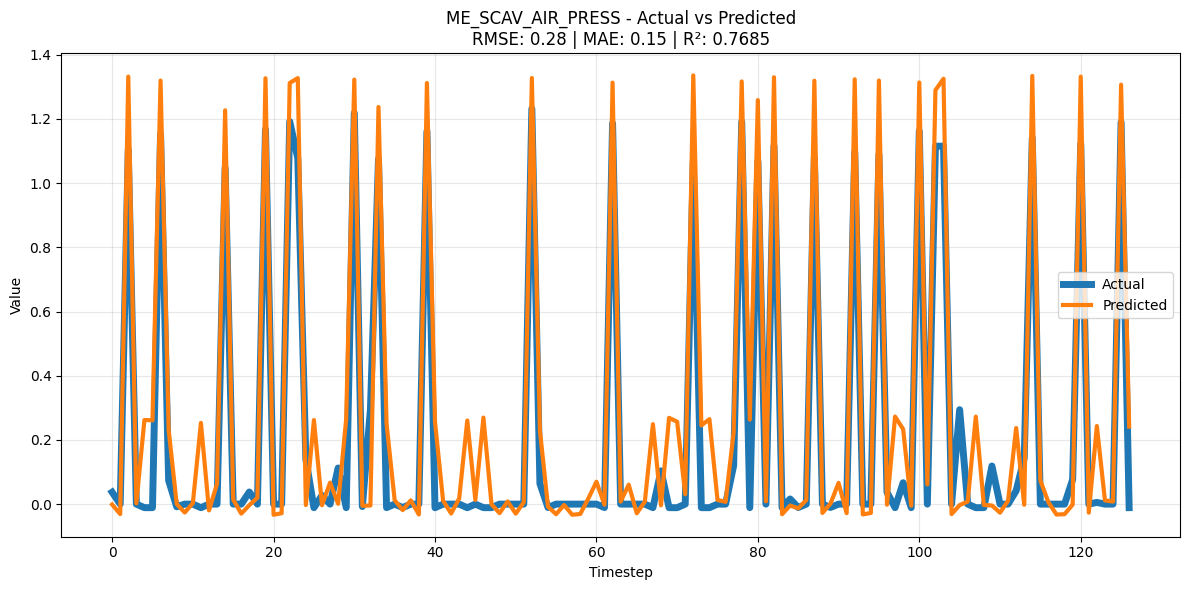

In [8]:
import json
import matplotlib.pyplot as plt

# Load JSON from file
with open('a.json', 'r') as f:
    data = json.load(f)

# Plot each feature
for result in data['plot_data']:
    feature_name = result['feature_name']
    actual = result['actual']
    predicted = result['predicted']
    timestamps = result['timestamps']
    metrics = result['metrics']
    
    plt.figure(figsize=(12, 6))
    plt.plot(actual, label='Actual', linewidth=5)
    plt.plot(predicted, label='Predicted', linewidth=3)
    plt.title(f"{feature_name} - Actual vs Predicted\nRMSE: {metrics['rmse']:.2f} | MAE: {metrics['mae']:.2f} | R²: {metrics['r2']:.4f}")
    plt.xlabel('Timestep')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [5]:
import json
import pandas as pd

# Load JSON
with open('a.json', 'r') as f:
    data = json.load(f)

result = data['plot_data'][0]  # First feature
timestamps = pd.to_datetime(result['timestamps'])

# Check continuity
print(f"Total data points: {len(timestamps)}")
print(f"First timestamp: {timestamps[0]}")
print(f"Last timestamp: {timestamps[-1]}")
print(f"\nTime differences between consecutive points:")
time_diffs = timestamps[1:] - timestamps[:-1]
print(time_diffs.value_counts().head(10))

# Check for gaps
expected_interval = pd.Timedelta('15 minutes')
gaps = time_diffs[time_diffs != expected_interval]
if len(gaps) > 0:
    print(f"\n⚠️ Found {len(gaps)} gaps (not 15-min intervals)")
    print(gaps[:10])  # Show first 10 gaps
else:
    print("\n✅ All timestamps are continuous 15-min intervals")

Total data points: 127
First timestamp: 2025-08-05 08:15:00
Last timestamp: 2025-10-05 23:45:00

Time differences between consecutive points:
0 days 06:00:00    21
0 days 03:45:00    12
0 days 12:00:00     8
0 days 02:15:00     8
0 days 08:15:00     7
0 days 18:00:00     6
0 days 02:00:00     5
0 days 00:15:00     4
1 days 00:00:00     4
0 days 09:45:00     4
Name: count, dtype: int64

⚠️ Found 122 gaps (not 15-min intervals)
TimedeltaIndex(['0 days 12:00:00', '0 days 12:00:00', '0 days 12:00:00',
                '0 days 06:00:00', '1 days 06:00:00', '1 days 00:00:00',
                '1 days 06:00:00', '1 days 18:00:00', '0 days 21:45:00',
                '0 days 08:15:00'],
               dtype='timedelta64[ns]', freq=None)
